<a href="https://colab.research.google.com/github/syedshubha/TeachingQuantumComputing/blob/main/DensityMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import *
from sympy import I as i
from sympy.physics.quantum import *

In [2]:
id = Matrix([[1,0],[0,1]])
id

Matrix([
[1, 0],
[0, 1]])

In [3]:
Z = Matrix([[1,0],[0,-1]])
X = Matrix([[0,1],[1,0]])

In [4]:
Y = i*X*Z
Y

Matrix([
[0, -I],
[I,  0]])

$R_x (\theta) = e^{-i\theta X/2}$

In [5]:
x = symbols('x')
Rx = exp(-i*x*X/2)

In [6]:
simplify(Rx)

Matrix([
[   cos(x/2), -I*sin(x/2)],
[-I*sin(x/2),    cos(x/2)]])

In [7]:
I = id

$H= I\otimes X + Z \otimes I$

$e^H = e^Z \otimes e^X$

In [8]:
# I⊗X
TensorProduct(id,X)

Matrix([
[0, 1, 0, 0],
[1, 0, 0, 0],
[0, 0, 0, 1],
[0, 0, 1, 0]])

In [9]:
# X⊗I
TensorProduct(X,id)

Matrix([
[0, 0, 1, 0],
[0, 0, 0, 1],
[1, 0, 0, 0],
[0, 1, 0, 0]])

In [10]:
H = TensorProduct(I,X) + TensorProduct(Z,I)
A = exp(H)

In [11]:
B = exp(Z)
C = exp(X)
D = TensorProduct(B,C)

In [12]:
A

Matrix([
[ 1/2 + exp(2)/2, -1/2 + exp(2)/2,               0,               0],
[-1/2 + exp(2)/2,  1/2 + exp(2)/2,               0,               0],
[              0,               0, exp(-2)/2 + 1/2, 1/2 - exp(-2)/2],
[              0,               0, 1/2 - exp(-2)/2, exp(-2)/2 + 1/2]])

In [13]:
D

Matrix([
[ E*(exp(-1)/2 + E/2), E*(-exp(-1)/2 + E/2),                          0,                          0],
[E*(-exp(-1)/2 + E/2),  E*(exp(-1)/2 + E/2),                          0,                          0],
[                   0,                    0,  (exp(-1)/2 + E/2)*exp(-1), (-exp(-1)/2 + E/2)*exp(-1)],
[                   0,                    0, (-exp(-1)/2 + E/2)*exp(-1),  (exp(-1)/2 + E/2)*exp(-1)]])

In [14]:
M = Matrix([[1+i,1-i],[2, 3+i]])
M

Matrix([
[1 + I, 1 - I],
[    2, 3 + I]])

In [15]:
Dagger(M)

Matrix([
[1 - I,     2],
[1 + I, 3 - I]])

In [16]:
%pip install --quiet qiskit qiskit-aer pylatexenc &> /dev/null

In [17]:
from qiskit import *
from qiskit.quantum_info import *

In [18]:
Bell = QuantumCircuit(2)
Bell.h(0)
Bell.cx(0,1)
Bell.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

State = $|\phi ^+ \rangle$
Density Matrix = $|\phi ^+ \rangle \langle \phi ^+| $

In [19]:
rho_AB = DensityMatrix.from_instruction(Bell)
rho_AB.draw('latex', prefix="\\rho_{AB} = ")

<IPython.core.display.Latex object>

$(0.6, |0 ⟩), (0.4, |+⟩) $

$\rho = 0.6 |0 ⟩ ⟨0| + 0.4 |+⟩ ⟨+|   $

In [20]:
q = QuantumCircuit(1)
rho = DensityMatrix.from_instruction(q)
rho.draw('latex', prefix="\\rho = ")

<IPython.core.display.Latex object>

In [21]:
q = QuantumCircuit(1)
q.h(0)
rho = DensityMatrix.from_instruction(q)
rho.draw('latex', prefix="\\rho = ")

<IPython.core.display.Latex object>

In [22]:
state1 = DensityMatrix.from_label('0')
state1.draw('latex', prefix="|0 ⟩ ⟨0| = ")

<IPython.core.display.Latex object>

In [23]:
state2 = DensityMatrix.from_label('+')
state2.draw('latex', prefix="|+⟩ ⟨+| = ")

<IPython.core.display.Latex object>

In [24]:
state = 0.6*state1 + 0.4*state2 #Density Matrix
state.draw('latex', prefix="0.6|0⟩ ⟨0|+0.4|+⟩ ⟨+| = ")

<IPython.core.display.Latex object>

In [25]:
from qiskit.visualization import plot_bloch_multivector as bloch

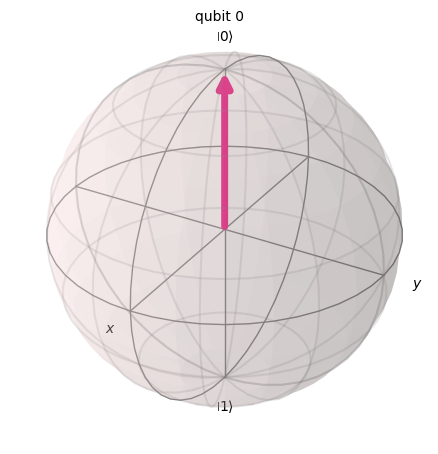

In [26]:
bloch(state1)

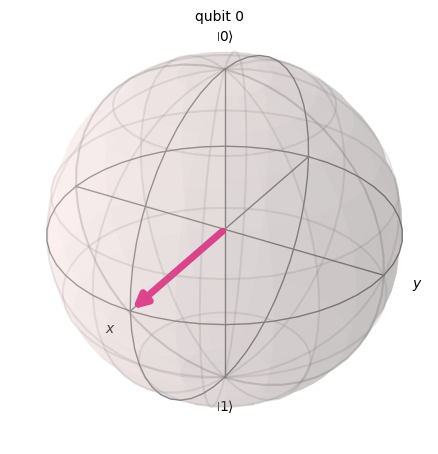

In [27]:
bloch(state2)

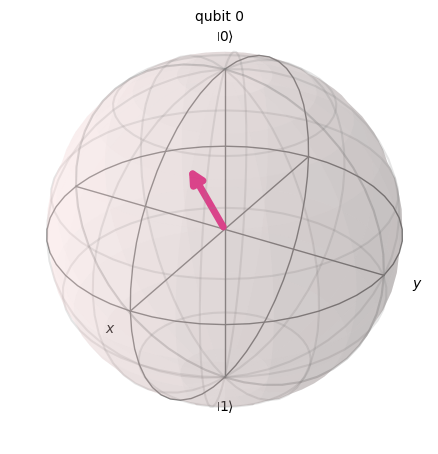

In [28]:
bloch(state)

In [29]:
state.purity()

np.complex128(0.7599999999999999+0j)

In [30]:
(4/5)**2 + 3*(1/5)**2

0.7600000000000001

In [31]:
max = 0.5*(DensityMatrix.from_label('0')+DensityMatrix.from_label('1')) #maximally mixed
max.draw("latex")

<IPython.core.display.Latex object>

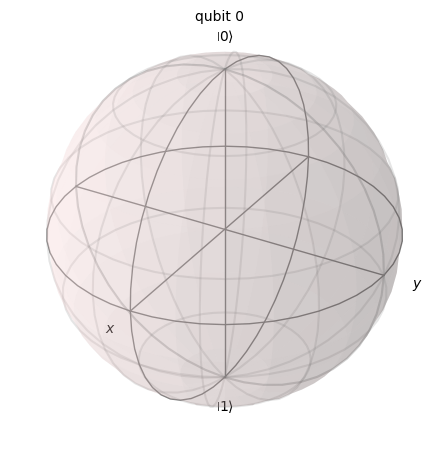

In [32]:
bloch(max)

In [33]:
max.purity()

np.complex128(0.5+0j)

In [34]:
q = QuantumCircuit(2)
q.initialize([0.6,-0.8],0)
q.initialize([0.8,0.6],1)
q.cx(0,1)
q.h(0)
q.z(1)
q.draw()

┌──────────────────────┐     ┌───┐
q_0: ┤ Initialize(0.6,-0.8) ├──■──┤ H ├
     ├─────────────────────┬┘┌─┴─┐├───┤
q_1: ┤ Initialize(0.8,0.6) ├─┤ X ├┤ Z ├
     └─────────────────────┘ └───┘└───┘

In [35]:
D = DensityMatrix.from_instruction(q)
D.draw("latex")

<IPython.core.display.Latex object>

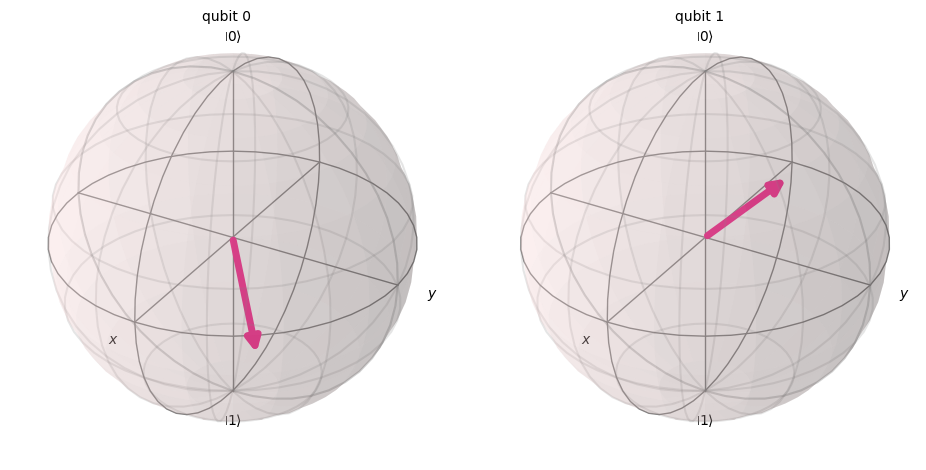

In [36]:
bloch(D)

In [37]:
DA = partial_trace(D,[1]) #reduced state
DA.draw("latex")

<IPython.core.display.Latex object>

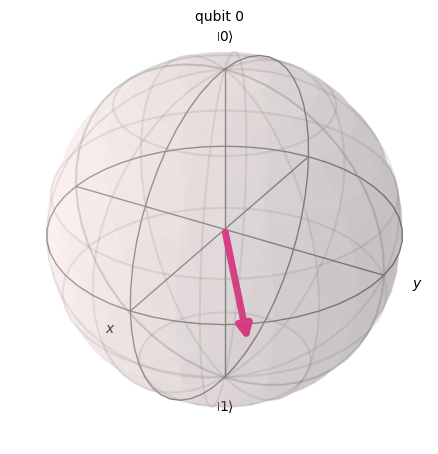

In [38]:
bloch(DA)

In [39]:
DB = partial_trace(D,[0])
DB.draw("latex")

<IPython.core.display.Latex object>

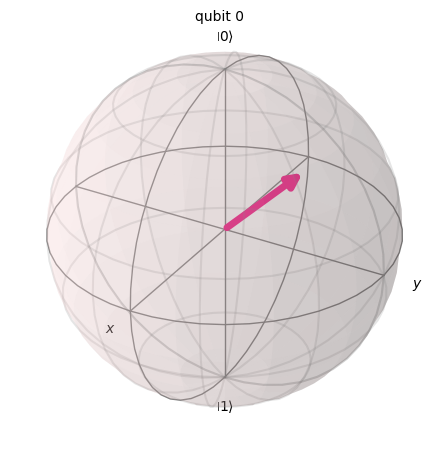

In [40]:
bloch(DB)

In [41]:
D.purity()

np.complex128(0.9999999999999998+0j)

In [42]:
DA.purity()

np.complex128(0.9638732799999998+0j)

In [43]:
DB.purity()

np.complex128(0.96387328+0j)

In [44]:
from numpy import *

In [45]:
psi = array([[0.6,-0.8j]]).T
print(psi)

[[ 0.6+0.j ]
 [-0. -0.8j]]


$(0.5,|0⟩), (0.2,|+⟩), (0.3, 0.6|0⟩-0.8i|1⟩$

In [46]:
states = array([[1, 0], [1/sqrt(2), 1/sqrt(2)], [0.6, -0.8j]]).T
print(states)

[[ 1.        +0.j   0.70710678+0.j   0.6       +0.j ]
 [ 0.        +0.j   0.70710678+0.j  -0.        -0.8j]]


state $= [|\psi⟩_1 , |\psi⟩_2 , ..., ]$ \\
prob $=[p_1, p_2, ... ]$

In [47]:
prob = [0.5, 0.2, 0.3]

In [48]:
states.shape

(2, 3)

In [49]:
conj(states[:,2])

array([ 0.6-0.j , -0. +0.8j])

In [50]:
states[:,2].reshape(-1,1)

array([[ 0.6+0.j ],
       [-0. -0.8j]])

In [51]:
def DensityMatrices(states, prob):
  rho = 0
  for i in range(states.shape[1]):
    rho = rho + prob[i]*outer(states[:,i], conj(states[:,i]))
  return rho

In [52]:
rho = DensityMatrices(states, prob)
rho

array([[0.708+0.j   , 0.1  +0.144j],
       [0.1  -0.144j, 0.292+0.j   ]])

In [53]:
trace(rho)

np.complex128(1+0j)

In [54]:
eigenval, eigenbasis = linalg.eig(rho)

In [55]:
eigenval

array([0.77202941-5.67741392e-18j, 0.22797059+3.34329895e-17j])

In [56]:
l= eigenval.real
l1= l[0]
l2 = l[1]

In [57]:
l1+l2

np.float64(0.9999999999999999)

In [58]:
r = abs(l1-l2)

In [59]:
r

np.float64(0.5440588203494175)